# Analysing computational chemistry data

Computational chemistry programs produce a large amount of data, and output files which are often far too cumbersome to read through by hand. Luckily file handling and text processing is an area where python excels!

We'll be using python functions and `matplotlib` to process and plot compchem data, both from pre-computed data files attached with this notebook, and from output files you generated with Q-chem earlier in the course.

To make it easier to follow along with some code functions used later on, there will be a brief look some python functions which process text. You might even find some of these capabilities useful in scientific tasks you will encounter in other areas!

### Python text functions

Python stores text as a 'string' of characters, ordered 0, 1, 2, 3.. for the first, second, third character etc. You might have noticed in early plotting commands that text strings were often distingushed by single `' '` or double `" "` quotes to separate them from code variables. 

You can break a string into individual characters by accessing the 'element' of the string with numbered position in square brackets `[ ]`.  

The semi colon `:` is a special symbol standing for 'all elements' and you can put a number before or after the semicolon to indicate the start or end, respectively, of all the elements you want.

In [32]:
print ('dog'[0], 'dog'[1], 'dog'[2])
print('dog'[:])
print('dog'[:2])
print('dog'[1:])

d o g
dog
do
og


Similarly python often stores a series of sentences as a 'list' of text strings. So you can acces each string by therir element number in the list, and each character the the element in the string.

_Try changing the element numbers to see resulting output. If you go beyond the amount of elements in a list or string, an error will occur._

In [2]:
sentences = ['the cat sat on the mat', 'the quick brown fox jumped over the lazy dog', 'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo']

In [3]:
print(sentences[0])

the cat sat on the mat


In [4]:
print(sentences[1][41], sentences[1][42], sentences[1][43])

d o g


Often a sentence or line in an output file has words or sections which are separated by whitespace (blank areas), and we just want one section of the whole line. We can use the `.split()` function *on* a string and python will give back a list of words which were separated by whitespace.

In [5]:
quick_fox = 'the quick brown fox jumped over the lazy dog'
split_string = quick_fox.split()

print(split_string)
print(split_string[3])
print(split_string[8])

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
fox
dog


It is sometimes useful to create empty 'placeholder' lists which you then populate with variables. Empty square brackets `[]` create an empty list, and the `list.append()` function will take any value in the parantheses and put it on the end of the list.

In [2]:
new_list = []
print(new_list)

[]


In [3]:
new_list.append('some')
print(new_list)

['some']


In [5]:
new_list.append('items')
new_list.append('for')
new_list.append('my')
new_list.append('new')
new_list.append('list')
new_list.append(5)
print(new_list)

['some', 'items', 'for', 'my', 'new', 'list', 5, 'items', 'for', 'my', 'new', 'list', 5]


### Converting between text and numbers
Lastly, by default python reads everything from a file in as a string of text characters, but often what we are trying to do is extract numerical data for plotting. In this case we need to convert from a `str` (_string_) data type to either an `int` (_integer_) or `float` (_floating point decimal_) depending on whether we have whole-number or decimal values. 

The examples below should show these data types behave quite differently.

In [9]:
print('2 + 2')

2 + 2


In [10]:
print(int(2) + int(2))

4


In [11]:
print(float(2)+float(2))

4.0


In [6]:
print(int(3.5)+float(3.5))   #Note int() is just converting 3.5 -> 3 

6.5


You should see that we convert between these data types by wrapping them in a conversion function, such as `int()`, `float()`, or `str()` (_if such conversion can be achieved_). So in processing compchem output files we will often read in the data as a `str` and then convert to a `float` for analysis and plotting.

Some quick conversion examples are below.

In [7]:
# strings of number characters
numbers_1 = '123'
numbers_2 = '56.78'

In [14]:
print(numbers_1 + numbers_2) # Just writes the strings one after another

12356.78


In [15]:
print(int(numbers_1) + int(numbers_2)) # This won't work because the text values aren't all integers

ValueError: invalid literal for int() with base 10: '56.78'

In [8]:
print(float(numbers_1) + float(numbers_2)) # What we probably want

179.78


## Processing output files

If you have a file in the same folder python is running, you can open it as a 'file object' with the `open()` command, by giving it the filename and what you want to do with it. For example `file_object = open('test.dat','r')` opens the file with name matching the string 'test.dat' for reading (*'r'*). 

**Please replace 'CH2O-opt.out' with the filename of your uploaded output file.**

(_Note: if the file is in another folder the whole folder path to the file should be given_)

### Extracting energy values from an output file
Read along with the code below, and see how we can easily take out any data we want from an output file by using small python programs. 

The main thing used is the `.readlines()` command which dumps all lines in the file object into a list of strings (much like the 'sentences' example before); one string for each line.

We can then use a `for` loop to apply logic to each line/string in the list generated by `.readlines()`. 

In this case an `if` statement is used to check if line contains a string reporting an energy. Each line which statisifies the `if` statement then has the energy value split out (`.split()[]`), converted to a numeric value (`float()`), then append to a list (`.append()`), using the file processing techniques just covered.

This list of energy values is now in the right format to plot with `matplotlib`

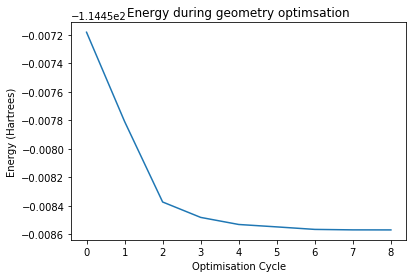

In [11]:
import matplotlib.pyplot as plt

file = open('CH2O-opt.out','r')  # open file with 'CH2O-opt.out' filename for reading, return file object
lines = file.readlines()    # read all the lines of the file 
file.close()  # close file object

e_vals = []   # placeholder list to store the energy values

for line in lines:    # For loop goes through each line of the list 'lines'
    if 'Energy is' in line:  # if it's an energy line
        energy_text = line.split()[2] # Split by columns, take the 3rd column with the energy value. Currently still text.
        energy = float(energy_text) # Convert from text string to a 'floating point' number value 
        e_vals.append(energy)   # add energy value to end ofe_vals list
        
plt.plot(e_vals)
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Optimisation Cycle')
plt.title('Energy during geometry optimsation')

plt.show()

The plot should show a decreasing overall energy as the program tries to optimise the geometrical parameters of the molecule to achieve the lowest energy configuration. Often the optimisation begins with quite a steep 'drop' as the calculation improves upon a hand-drawn structure, and then the energy more slowly converges to a minimum value.

### Extracting marked sections from output files

With code like this we can write rules to process the output file anyway we like. For example Q-chem output files report the energy during the SCF cycles in a block which looks like this: (*Note: each geomerty optimisation step will have several SCF cycles within it*)

```
Cycle       Energy         DIIS error
 ---------------------------------------
 1    -114.4587806028      4.35e-05  
 2    -114.4585682739      1.88e-05  
    .
    .
    .
 ---------------------------------------
 SCF time: ...
```

We'll need to add some logic to recognise when to start reading these blocks and when to end reading, ignoring the output file content outside of the relevant section. This code relies on a for loop going through every line in the file, and a 'toggle' which marks whether the current section is relevant or not. 

_The code structure in this section is more nested and advanced._ Try to go through step-by-step to follow what's going on. Don't worry though, most other examples will avoid this complexity. Please ready **all** if statements to see when the `relevant` variable will toggle from `True` and `False`.

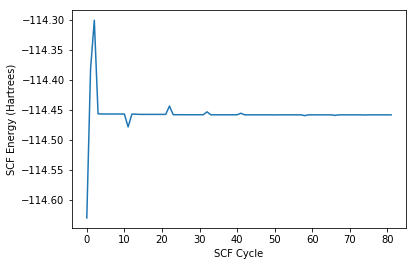

In [17]:
# Read all the file contents to a list of lines as before
file = open('CH2O-opt.out','r')
lines = file.readlines()   
file.close()

scf_vals = [] # Empty list to store SCF energies in


# We now go through line by line, marking all lines between 'Cycle' and 'SCF time' as relevant to be processed
relevant = False  # Varaible marking if the line is relevant to be processed. Will be true once we hit 'Cycle' in a line

for line in lines:   # Go through line-by-line
    if line.startswith(' SCF time:'): # If 'SCF Time' is encounter at end of section, stop reading until next 'Cycle'
        relevant = False
    
    if relevant:  # Processing the sections marked relevant
        if line.startswith(' ---'): # Notice the dash border lines
            continue    # Use 'continue' to skip onto the next line without processing dashes
        e_scf = float(line.split()[1])  # For energy lines: take the 2nd column value, as a number
        scf_vals.append(e_scf) # add scf energies to scf_vals list
    
    if 'Cycle       Energy' in line: # Whenever a new Cycle block is encountered
        relevant = True   # Start processing the section as relevant again

    # For loop has now gone through entire ouput file     
        
# all SCF energies have been extracted, time to plot them.

plt.plot(scf_vals)

plt.ylabel('SCF Energy (Hartrees)')
plt.xlabel('SCF Cycle')

plt.show()

Changes in SCF energy as the program goes through self-consistency calculations can be largely masked by the big energy gains during optimisation. If each individual SCF Cycle block was investigated separately a steady decrease should be observed. 

It could also be instructive to see how the DIIS error changes as the SCF iterations progresses. This could be easily achieved by selecting element `[2]` instead of `[1]` from the split line from plotting, since in the output file the error is reported in the column after the energy.

# Exploring the molecular PES (potential energy surface)

Almost everything about what a molecule's properties —how stable it is, its geometry, how it reacts— can be determined from a molecule's potential energy surface (PES).

Calculating the PES of molecules is one of the most common tasks of computational chemistry programs. While 'reaction diagrams' are frequently used in teaching chemistry to summarise the energy required as a reaction progresses, such diagrams are only one dimensional and so can only represent energy vs. one type value (say bond length for simple reactions), or some generalised notion of 'reaction progress'.

A full understanding of how a molecule behaves needs a description of how the energy changes with each change in a molecule's properties (bonds, angles etc.) This means the $3N-6$ ($N$ = atoms, 3N-5 for linear) structural properties —*degrees of freedom*— which can alter the energy of a molecule; the same properties that can be observe as normal modes in vibrational spectroscopy.

#### As such a full description of a molecule's PES would need to have 3N-6 axes, and so would be a 3N-6 dimensional _hypersuface_.

However often a only a few of a molecule's bonds, angles, etc., participate significantly in a reaction, and so often only a couple  of key axes are need. In this section we will stick to simple chemical systems where the energy change with only 2 axes are needed to understand the system, in order to keep things visualisable by 3D plots.

As you learn about reaction mechanisms try to think about the PES of a molecule as *all* normal modes change, and how that can be simplified by thinking about only the key ones participating in a reaction 


(_Source of PESs_: _J. Chem. Educ._, **2015**, _92_ (12), pp 2106–2112)

#####  Firstly run this magic command to make 3D plots in the notebook interactive:

In [18]:
%matplotlib notebook  

### 3D PES between 2 chemical minima ( $A \rightleftharpoons B$ ) 

Below is the code to generate a 'dummy PES' representing what a surface might look like for a molecule which has two stable forms (e.g. isomers) which it can interconvert between. In this case we are using two generalised 'coordinates' to stand in for the energy of the molecular configuration as, say, a bond and an angle change.

The setup for 3D plots is a little more complicated, but Axes3D module is imported to allow 3D plots to be generated, and the colourmap (`cm`) allows for easy to read colour schemes. 

After the `import` setup statements the next two lines generate an `ax` 'axis' object that we can add data onto, analogous to how the `plt` object was used for 2D plots. It's then a fairly simple matter of generating an x-range, a y-range, forming them into a 2D grid (`.meshgrid(x,y)`), and then using an equation to compute a z-value at every point on the xy-grid.

<IPython.core.display.Javascript object>


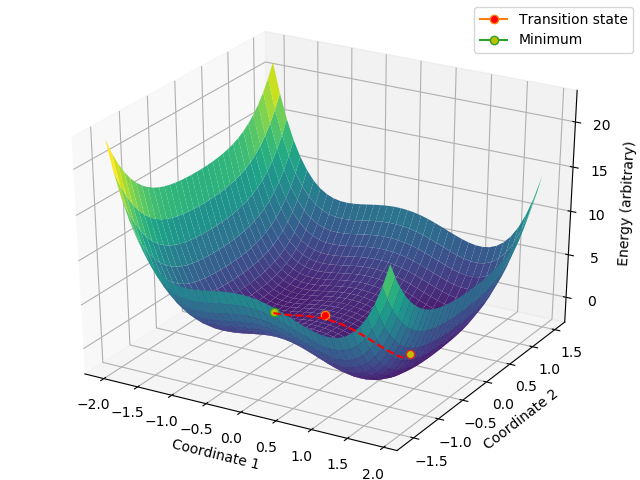

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #colour manager
from mpl_toolkits.mplot3d import Axes3D #For plotting on 3D axes

two_minima = plt.figure()  # set up a named figure
ax = Axes3D(two_minima)    # generate 3D axes to put data on

X = np.arange(-2,2,0.1)    # x and y ranges
Y = np.arange(-1.6,1.6,0.1)
X, Y = np.meshgrid(X, Y) # construct the 2D mesh from the 1D array of values
Z = -3*X**2 + 1.5*X**4 - 0.9*X + Y**2 + Y**4  # Equation for Z-values computed at points on the xy-mesh

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis) # plot surface vals, followed by detail settings & colour

# Axes3D has a slightly different syntax for labelling axes
ax.set_xlabel('Coordinate 1')
ax.set_ylabel('Coordinate 2')
ax.set_zlabel('Energy (arbitrary)')

#Annotating transition state and minima locations
ax.plot([-0.145], [0], [0.5], markerfacecolor='r', marker='o', label="Transition state")
ax.plot([-0.9], [0], [-0.5], markerfacecolor='y', marker='o', label="Minimum")
ax.plot([1.09], [0], [-1.75], markerfacecolor='y', marker='o')
ax.legend()

# Adding a curve to the 3D plot to show lowest energy path between minima, in this case: just equation with y=0
x_mep = np.arange(-0.9,1.09,0.1)
z_mep = -3*x_mep**2 + 1.5*x_mep**4 - 0.9*x_mep
ax.plot(x_mep, z_mep, zs=0, zdir='y', color='r', linestyle='dashed', label="Minimum energy pathway")

plt.show()

***Drag the 3D plot around to get a sense of this simple PES***

Molecules can often have two or more stable forms (e.g. isomers) they can exist in, often with one form more thermodynamically favoured and populated than the others. Each stable molecule will be a 'local minimum' on the PES, where the energy funnels down into a low point in a 'well'. Thus, to move from one molecule (_minimum_) to another, energy is required to climb up the PES. However some minima are deeper than others, as shown in this example. The 'global minimum' (lowest energy point on the surface) will be the most energetically favoured molecular form in the long run.

The height a molecule has to climb out of a minimum well is the activation energy ($E_{a}$) and will determine the kinetics of the reaction, whereas the depth will determine the thermodynamically favoured product. 

The point of maximum height on the easiest path between the two wells is the marked 'tranistion state', and thus if the transition state can be found then $E_{a}$ of a reaction can be determined. If you examine the PES you can see these marked minima and tranistion state are points where the gradient goes flat (_is zero_) and so mathematically a program can compute a PES and search for these stationiary points, which tell you the key structures of a molecule.

### As a Contour Plot
As science is often communicated via papers and .pdf files which are non-interactive, scientsits often use top-view projections of the PES to show the key details, while fitting a flat format.

Below the the same 3D PES data is replotted, just with a different function (`.contour()`) to generate a contour plot. Compare with the surface plot above to get a feeling of how different features of the PES are represented in 2D.

<IPython.core.display.Javascript object>


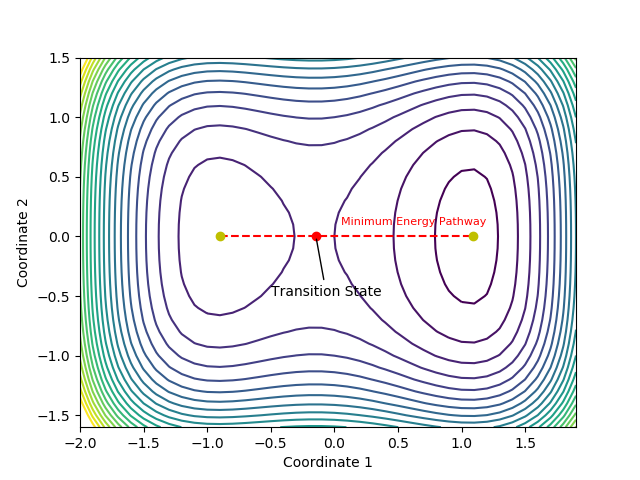

In [21]:
fig, ax = plt.subplots() #new axes to put contour plot onto

contour_levels = np.arange(-4,20,1) # minimum value, maximum value, and step size of contours

contour_set = ax.contour(X, Y, Z, cmap=cm.viridis, levels=contour_levels) # generate plot, returns set of contours

#### Uncomment the line below if you want numerical values printed on the contour lines
# ax.clabel(contour_set, inline=1, fontsize=10) #label the set of contours with their value

ax.set_xlabel('Coordinate 1')
ax.set_ylabel('Coordinate 2')

# Annotate the minimum energy pathway and stationary points
plt.plot([-0.9,1.09], [0,0], color='r', linestyle="dashed")
plt.plot(-0.9, 0, 'yo')
plt.plot(1.09, 0, 'yo')
plt.text(0.05, 0.1, 'Minimum Energy Pathway', fontsize=8, color='r')
plt.plot(-0.145, 0, 'ro')
ax.annotate('Transition State', xy=(-0.145,0), xytext=(-0.5,-0.5), arrowprops={'arrowstyle': '-',  'color': 'black'})

plt.show()

### Simplified as a Reaction Diagram
If we take a 1D slice through the mimimum energy path between the two minima, we recover the familiar 'Reaction Diagram'  encountered in undergraduate chemistry.


So, the familiar picture we have is just a simplifaction, taking only one slice through the most likely pathway of reaction, the minimum energy pathway (MEP). This works because most molecules will react along the path requiring the least energy, therefore following the MEP, and the higest point on this MEP —the transition state— will become the energy bottleneck and thus determine the rate of reaction.

<IPython.core.display.Javascript object>


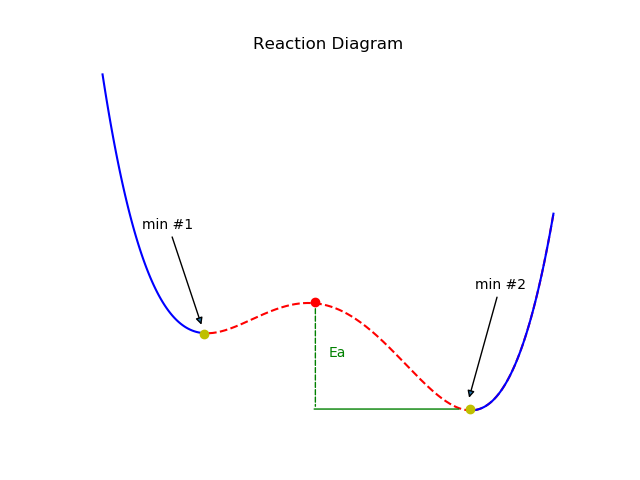

In [22]:
R = np.arange(-1.7,1.7,0.01)  # restricted range for plot clarity

E_1D = -3*R**2 + 1.5*R**4 - 0.9*R # Energy only as a function of 'X' reaction coordinate, in this case all y=0

fig, ax = plt.subplots()

# Plot in segements to distinguish the minimum energy pathway from the rest
solid1 = R < -0.9
solid2 = R > -0.9
solid3 = R > 1.09
plt.plot(R[solid1],E_1D[solid1], 'b')
plt.plot(R[solid2],E_1D[solid2], 'r', linestyle='dashed')
plt.plot(R[solid3],E_1D[solid3], 'b')

plt.axis('off') # Hide axes values, just indictative
plt.title('Reaction Diagram')
plt.ylabel('Energy')

# Label the minima
ax.annotate('min #1', xy=(-0.95, -0.5), xytext=(-1.4, 1.8), arrowprops={'arrowstyle': '-|>'})
ax.plot(-0.94, -0.65, 'yo')
ax.annotate('min #2', xy=(1.05, -2.2), xytext=(1.1, 0.4),  arrowprops={'arrowstyle': '-|>'})
ax.plot(1.06, -2.39, 'yo')
# Ea lines and annotation
ax.annotate('', xy=(-0.1,-2.4), xytext=(-0.1,0.0), arrowprops={'arrowstyle': '-', 'ls' : 'dashed', 'color': 'green'})
ax.annotate('', xy=(1.0,-2.4), xytext=(-0.13,-2.4), arrowprops={'arrowstyle': '-',  'color': 'green'})
ax.text(0.0, -1.2, 'Ea', color='green')
ax.plot(-0.10, 0.1, 'ro')

plt.show()

### H$_{2}$ + H PES 
In the same folder as this excercise is a file called `H3.csv` which contains the computed PES of a system of three 
hydrogen atoms. The H atoms are just moving in a line so only 2 variables, the H1-H2 and H2-H3 distances, are plotted.

The PES data is in the `.csv`'comma-seperated values' format that Excel and the like can read, so feel free to open the file in Excel or a text editor see what the raw data looks like.

`numpy` has a function to read data from a textfile called `numpy.genfromtxt()`.  It requires a symbol which separates out the values, and in this case it's the comma symbol `,` since this is a .csv file. 

In the code below we use the `:` value to select all rows, then use column numbers to divide the columns up into separate numpy arrays for plotting.

_Note: for more complicated spreadsheets and data analysis applications, the excellent `pandas` package is available (https://pandas.pydata.org/) but numpy's functions will suffice for simpler cases._

For data like this a good function is `plot.tri_surf()`, as it can use three 1D arrays as the x, y, z values for a 3D plot.

***To quickly fit a curve to points along the MEP the `bezier` package will be installed.*** Don't worry to much about how `bezier` is working. An even better approach than just fitting sample points would be use pathfinding algorithms to find the path of the MEP of any given PES, but in this case the MEP is just for annotation.

In [21]:
! pip install bezier

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### PES of energy vs two H-H bond distances

<img src="figs/H3_bonds.png" width="400">

<IPython.core.display.Javascript object>


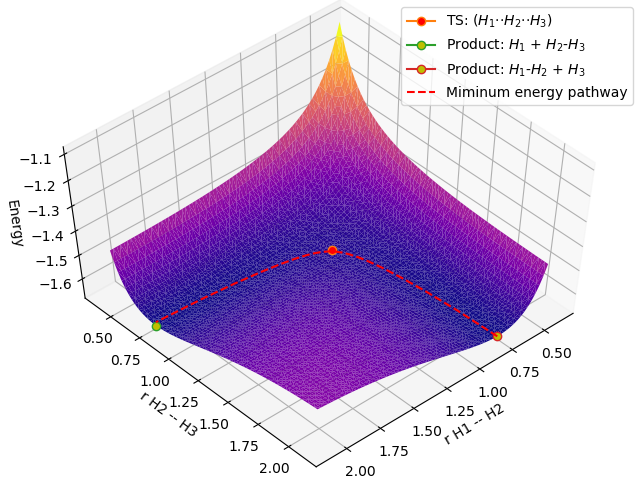

In [27]:
import bezier # for fitting curve to points along MEP

data = np.genfromtxt("H3.csv", delimiter=",") # get data from text file

r1 = data[:, 0] # all rows, column 1 
r2 = data[:, 1] # all rows, columm 2
E = data[:, 2] # all rows, column 3

H3 = plt.figure()
ax = Axes3D(H3)

ax.plot_trisurf(r1, r2, E, cmap=cm.plasma) # trisurf is easier to use with 1D arrays, like the column values from file

ax.set_xlabel('r H1 -- H2')
ax.set_ylabel('r H2 -- H3')
ax.set_zlabel('Energy')

# annontate transition state and exit channel products. $ symbols allow LaTeX formatting to be used in strings
ax.plot([0.94], [0.94], [-1.655], markerfacecolor='r', marker='o', label='TS: ($H_{1}··H_{2}··H_{3}$)')
ax.plot([2.1], [0.75], [-1.6714], markerfacecolor='y', marker='o', label='Product: $H_{1}$ + $H_{2}$-$H_{3}$')
ax.plot([0.75], [2.1], [-1.6714], markerfacecolor='y', marker='o', label='Product: $H_{1}$-$H_{2}$ + $H_{3}$')

# fitting a bezier curve to sample points along MEP
mep_nodes = np.array([ 
[0.75,0.775,0.85,0.875,0.94,0.975,1.0,1.25,2.1], # r1 coord points
[2.1,1.25,1.0,0.975,0.94,0.85,0.875,0.775,0.75], # corresponding r2 coord points
[-1.67142485,-1.66112361,-1.67142485,-1.65622395,-1.655,-1.67142485,-1.65622395,-1.66112361,-1.65646306] # energy points 
])
mep_curve = bezier.Curve.from_nodes(mep_nodes)  # create curve from input nodes
mep_samples = np.linspace(0,1,20)  # pick amount of sampling of curve
mep_points = mep_curve.evaluate_multi(mep_samples) # generate points to plot
plt.plot(*mep_points, color='r', linestyle='dashed', label='Miminum energy pathway') #pass mep_point values for curve

ax.view_init(elev=40, azim=45) # set initial view's elevation and azimuthal angle fo rbest picture

ax.legend()
plt.show()

From the plot you should be able to see how deep energy 'valleys' occure where one r H--H distance is close to the normal $H_{2}$ equilibirum value while the other H approaches. 

Molecules will react through these low energy valleys, and the energy 'hump' along the MEP in these values is the '1st order saddle point' — which is the location of the transition state to reaction. Because of the equivalence of the hydrogens in this system the two reaction channels are symmetrical. Below we'll view a more realistic system of a triatomic molecule dissocating.

### $ AB + C \leftarrow ABC \rightarrow A + BC$ dissociation channels 

<img src="figs/ABC.jpg" width="400">

With 3 (_linear_) atoms the molecular system would have 3\*3-5 = 4 normal modes, so a complete PES would be 4-dimensional. Howere people find it hard to visual 4 dimensions, and so in this triatomic we will plot the energy change with respect to separately changing bonds; ignoring the axes of other modes, which could be quite significant. 

The data is again stored as a .csv and can be plotted in the same way as the H2 + H PES above, just with some variables renamed for clarity. The structure of these plotting commands should become familiar, and it is easy to reuse code to rapidly generate many high-quality figues.

<IPython.core.display.Javascript object>


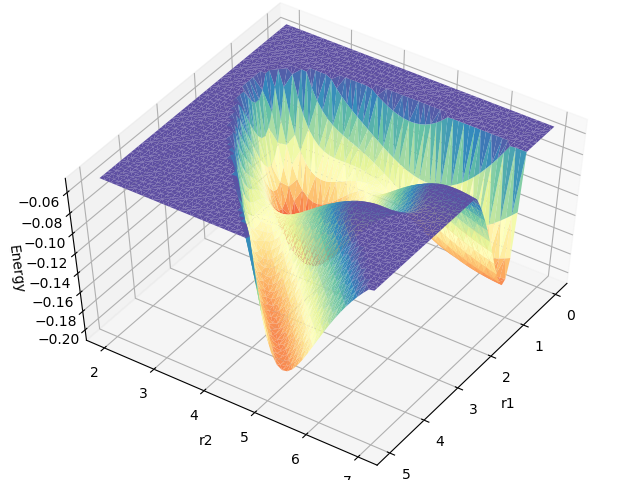

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

ABC_data = np.genfromtxt("ABC_surf_fine.csv", delimiter=",") # get data from text file

x_vals = ABC_data[:, 0] # all rows, column 1 
y_vals = ABC_data[:, 1] # all rows, columm 2
z_vals = ABC_data[:, 2] # all rows, column 3

ABC = plt.figure()
ax = Axes3D(ABC)

ax.set_xlabel('r1')
ax.set_ylabel('r2')
ax.set_zlabel('Energy')

ax.plot_trisurf(x_vals, y_vals, z_vals, cmap=cm.Spectral) # 'Spectral' gives a better colourmap of PES in this case.

ax.view_init(elev=80, azim=65) 
plt.show()

This plot reveals that bound molecules often reside in deep wells on the PES. The reaction pathways to dissociate and form stable molecules (often referred to as 'exit channels') are often deep grooves of low energy in the PES to react along.

Each of these reaction pathways should have an associated high energy saddle point along them (except for the non-typical A+B+C dissociation). See if you can locate the transition state for the two AB+C & A+BC reactions on the PES plot, you can compare to the early diagram for help.

#### Hopefully you have a sense of how coding languages like python can easily process data and generate high quality plots

As you go through the rest of CHEM3011, try thinking about ideal ways to represent physical chemistry data graphically, and what tools might be used to generated such plots.

For example when calculating transition states or mechanisms like the $S_{n}2$ reaction, think about what coordinates are key to the reaction and how you would extract that data from a computational chemistry output file to visualise

The code in these excercises should be easily reusable and adapated to other problems, if you have spare time experiment by modifying data and lines in the code cells to get a deeper sense of how python works.

*** There are many excellent online resources for free codes to do data analysis and plotting (R, Julia, Python) and it is worth finding one you feel comfortable with as they provide very valuable skills both inside and outside of science. ***